CHEKPOINT 2

DATA UNDERSTANDING & EDA

EMPLOYEE ATRITION ANALYSIS

NAMA : Muhammad Dzikri Andhika

NIM : 2509116103

BUSINESS UNDERSTANDING

1.1 Latar Belakang
Dataset ini berisi data karyawan yang mencakup informasi demografis, masa kerja, departemen, dan status attrition. Tingginya tingkat attrition dapat berdampak pada biaya rekrutmen, pelatihan, serta produktivitas perusahaan

1.2 Tujuan Analisis Bisnis
Analisis ini bertujuan untuk:
.Mengidentifikasi faktor-faktor yang berhubungan dengan attrition

.Mengetahui karakteristik karyawan yang memiliki risiko lebih tinggi untuk keluar

.Memberikan rekomendasi strategis guna menekan tingkat attrition

DATA UNDERSTANDING

2.1 LOAD DATASET

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MFG10YearTerminationData.csv.zip', compression='zip')
df.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


INSIGHT
Dataset berhasil dimuat dan menampilkan beberapa baris awal sebagai gambaran struktur data.

2.2 STRUKTUR DATA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49653 entries, 0 to 49652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   EmployeeID           49653 non-null  int64 
 1   recorddate_key       49653 non-null  object
 2   birthdate_key        49653 non-null  object
 3   orighiredate_key     49653 non-null  object
 4   terminationdate_key  49653 non-null  object
 5   age                  49653 non-null  int64 
 6   length_of_service    49653 non-null  int64 
 7   city_name            49653 non-null  object
 8   department_name      49653 non-null  object
 9   job_title            49653 non-null  object
 10  store_name           49653 non-null  int64 
 11  gender_short         49653 non-null  object
 12  gender_full          49653 non-null  object
 13  termreason_desc      49653 non-null  object
 14  termtype_desc        49653 non-null  object
 15  STATUS_YEAR          49653 non-null  int64 
 16  STAT

Insight:

Dataset terdiri dari ___ baris dan ___ kolom dengan kombinasi tipe data numerik dan kategorikal.

2.3 STATISTIK DESKRIPTIF

In [4]:
df.describe()

,EmployeeID,age,length_of_service,store_name,STATUS_YEAR
count,49653.000000,49653.000000,49653.000000,49653.000000,49653.000000
mean,4859.495740,42.077035,10.434596,27.297605,2010.612612
std,1826.571142,12.427257,6.325286,13.514134,2.845577
min,1318.000000,19.000000,0.000000,1.000000,2006.000000
25%,3360.000000,31.000000,5.000000,16.000000,2008.000000
50%,5031.000000,42.000000,10.000000,28.000000,2011.000000
75%,6335.000000,53.000000,15.000000,42.000000,2013.000000
max,8336.000000,65.000000,26.000000,46.000000,2015.000000


Insight:

Rata-rata usia karyawan adalah ___ tahun dan rata-rata masa kerja ___ tahun.

2.4 CEK TPE DATA

In [5]:
df.dtypes

,0
EmployeeID,int64
recorddate_key,object
birthdate_key,object
orighiredate_key,object
terminationdate_key,object
age,int64
length_of_service,int64
city_name,object
department_name,object
job_title,object


Insight:

Kolom seperti age dan length_of_service bertipe numerik, sedangkan department_name dan gender_full bertipe kategorikal.

2.5 CEK INCOSISTENT VALUES

In [6]:
df['gender_full'].unique()
df['department_name'].unique()

array(['Executive', 'Store Management', 'Meats', 'Recruitment',
       'Training', 'Labor Relations', 'HR Technology', 'Employee Records',
       'Compensation', 'Legal', 'Produce', 'Accounts Receiveable',
       'Bakery', 'Information Technology', 'Accounts Payable', 'Audit',
       'Accounting', 'Investment', 'Dairy', 'Processed Foods',
       'Customer Service'], dtype=object)

Insight:

Tidak ditemukan inkonsistensi penulisan pada kolom kategorikal.

2.6 CEK MISSING VALUES

In [7]:
df.isnull().sum()

,0
EmployeeID,0
recorddate_key,0
birthdate_key,0
orighiredate_key,0
terminationdate_key,0
age,0
length_of_service,0
city_name,0
department_name,0
job_title,0


Insight:

Tidak terdapat missing values pada dataset.

2.7 CEK DUPLICATED  VALUES

In [8]:
df.duplicated().sum()

np.int64(0)

Insight:

Tidak ditemukan data duplikat.

2.8 CEK OUTLIERS

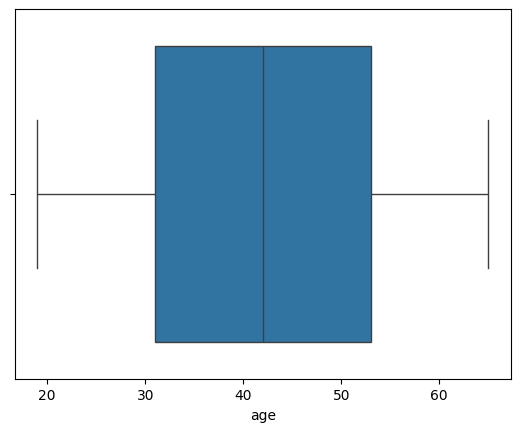

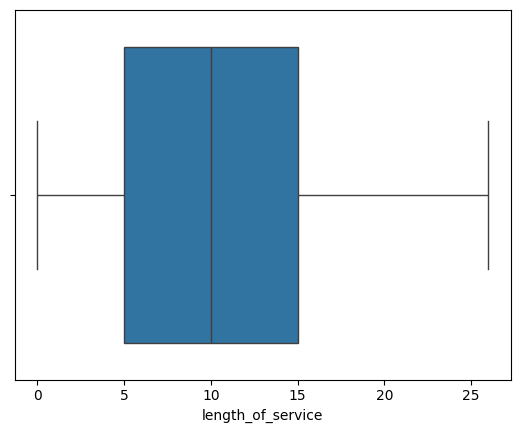

In [9]:
sns.boxplot(x=df['age'])
plt.show()

sns.boxplot(x=df['length_of_service'])
plt.show()

Insight:

Terdapat beberapa nilai ekstrem, namun masih dalam batas wajar secara bisnis.

EXPLORATORY DATA ANALISYIS (EDA)

3.1 COMPARISON (PERBANDINGAN)

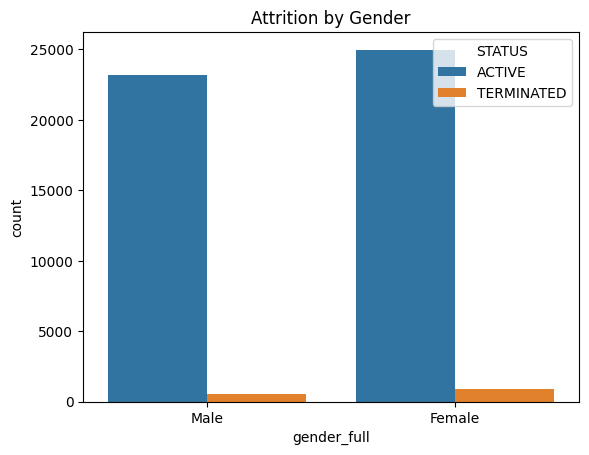

In [13]:
sns.countplot(x='gender_full', hue='STATUS', data=df)
plt.title("Attrition by Gender")
plt.show()

Insight:

Perbandingan attrition antara gender menunjukkan bahwa ___.

3.2 COMPOSITION(KOMPOSISI)

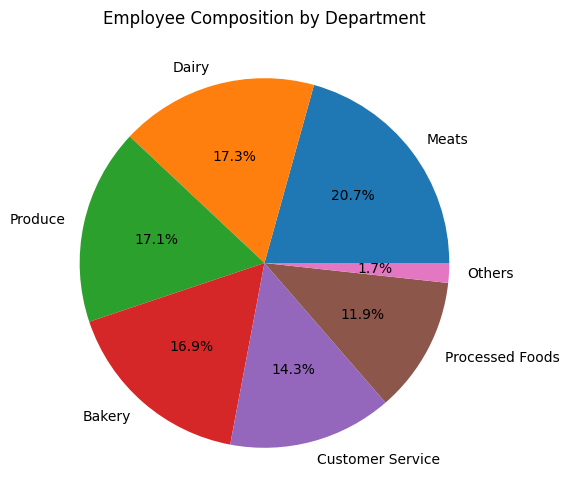

In [16]:
dept_counts = df['department_name'].value_counts()

top6 = dept_counts.head(6)
others = dept_counts.iloc[6:].sum()

top6['Others'] = others

plt.figure(figsize=(6,6))
plt.pie(top6, labels=top6.index, autopct='%1.1f%%')
plt.title("Employee Composition by Department")
plt.show()

Insight:

Sebagian besar karyawan berasal dari departemen ___.

3.3 DISTTIBUTION (DISTRIBUSI)

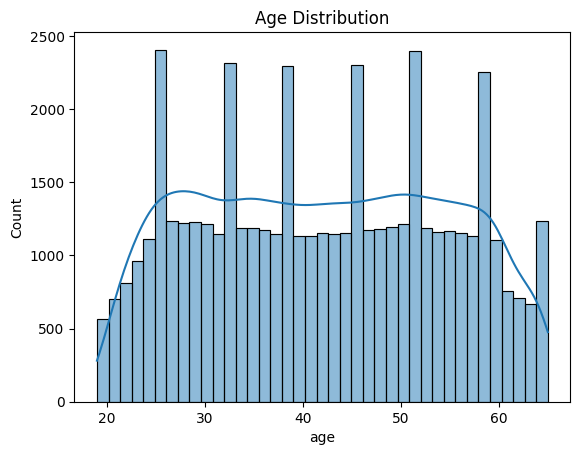

In [17]:
sns.histplot(df['age'], kde=True)
plt.title("Age Distribution")
plt.show()

Insight:

Distribusi usia menunjukkan bahwa mayoritas karyawan berada pada rentang usia ___.

3.4 RELATIONSHIP (HUBUNGAN)

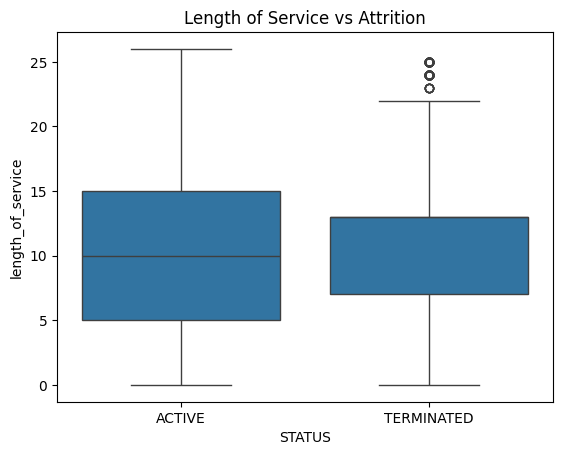

In [19]:
sns.boxplot(x='STATUS', y='length_of_service', data=df)
plt.title("Length of Service vs Attrition")
plt.show()

Insight :
Kalau boxplot menunjukkan median length_of_service lebih rendah pada TERMINATED:

Karyawan yang mengalami attrition cenderung memiliki masa kerja yang lebih rendah dibandingkan karyawan yang masih aktif. Hal ini menunjukkan bahwa risiko attrition lebih tinggi pada karyawan dengan masa kerja awal.

KESIMPULAN SEMENTARA

Berdasarkan hasil Data Understanding dan EDA, dapat disimpulkan bahwa faktor masa kerja dan beberapa karakteristik demografis memiliki hubungan dengan tingkat attrition.